In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 67.4k/67.4k [00:00<00:00, 1.16MB/s]

Extracting files...
Path to dataset files: C:\Users\Spandana\.cache\kagglehub\datasets\fedesoriano\stroke-prediction-dataset\versions\1


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# 1. Handling missing values
# For simplicity, we will fill missing BMI values with the mean of the column
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 2. Converting categorical variables into numerical format
# Using one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# 3. Feature scaling (optional, depending on your model)
# Normalizing numerical features using Min-Max scaling

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']])
scaled_df = pd.DataFrame(scaled_features, columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'])

# 4. Concatenate the scaled features back to the DataFrame
df = pd.concat([df.drop(columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']), scaled_df], axis=1)


C:\Users\Spandana\AppData\Local\Temp\ipykernel_40024\4227118265.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


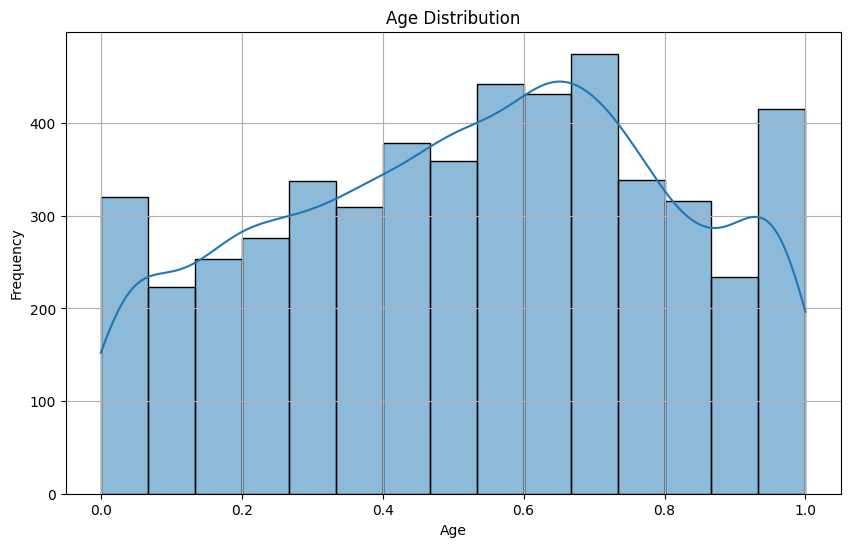

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


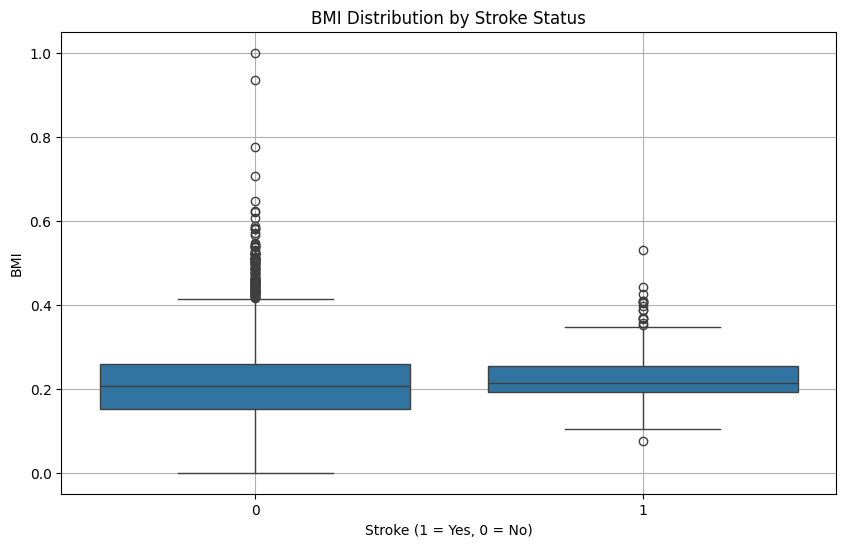

In [11]:
# Box plot for BMI by stroke status
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('BMI')
plt.grid()
plt.show()


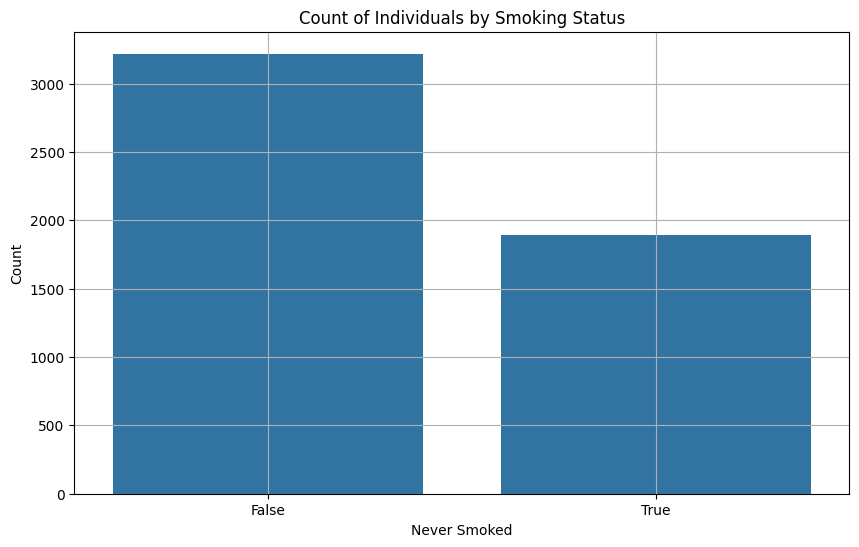

In [7]:
# Count plot for smoking status
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status_never smoked', data=df)
plt.title('Count of Individuals by Smoking Status')
plt.xlabel('Never Smoked')
plt.ylabel('Count')
plt.grid()
plt.show()


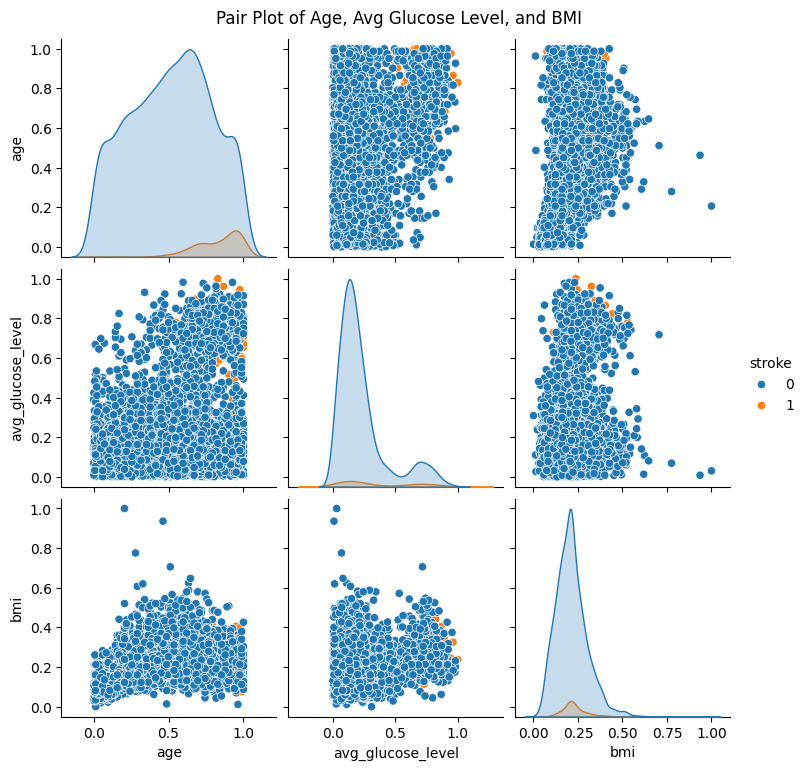

In [8]:
# Pair plot to visualize relationships
sns.pairplot(df, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.suptitle('Pair Plot of Age, Avg Glucose Level, and BMI', y=1.02)
plt.show()


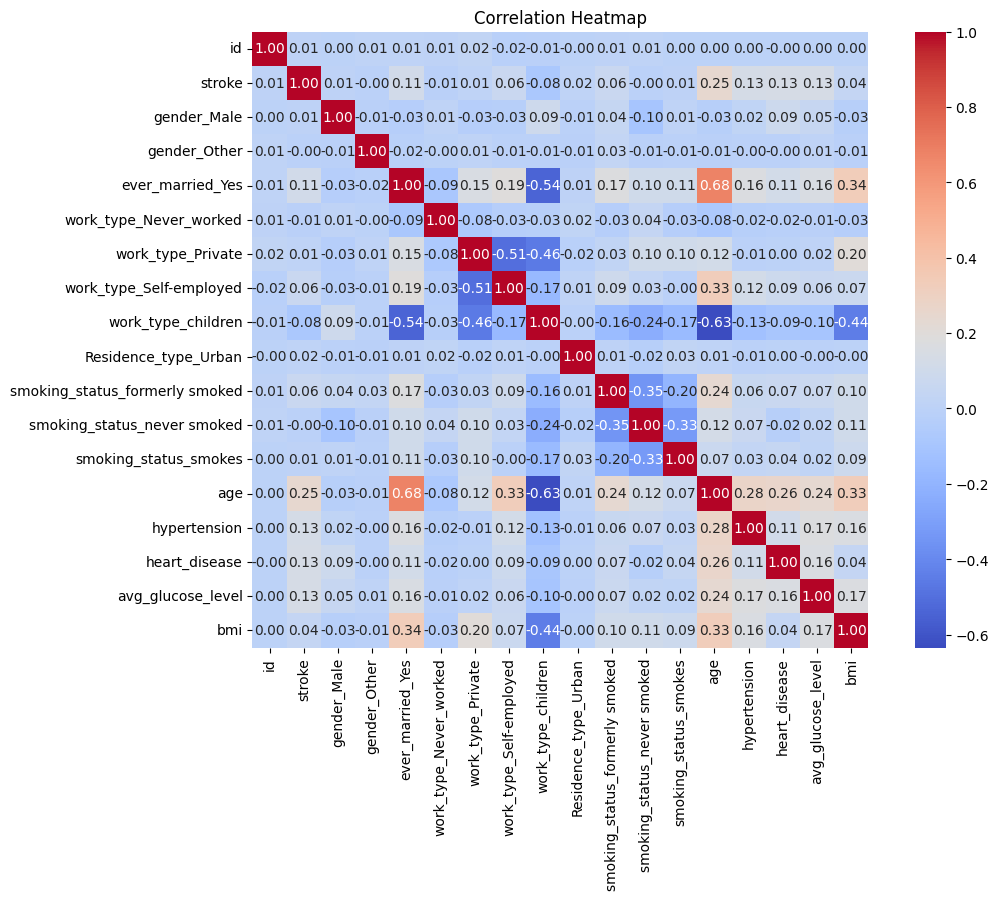

In [9]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


Logistic regression, Decision tree, Random Forest, XGBoost and Artificial Neural Networks.

In [10]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from scipy.stats import chi2_contingency

In [11]:
# Define features (X) and target (y)
X = df.drop(columns=['stroke'])
y = df['stroke']

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(max_iter=1000)
}

In [12]:
# Prepare cross-validation and result storage
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []


In [13]:
# Train and evaluate each model using cross-validation
for model_name, model in models.items():
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()
    roc_auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc').mean()
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

c:\Users\Spandana\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Spandana\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [14]:
    # Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("Model Evaluation Results:")
print(results_df)

# Save results to a CSV file
results_df.to_csv("model_evaluation_results.csv", index=False)

Model Evaluation Results:
                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.950881  0.015385  0.807117
1        Decision Tree  0.912329  0.151587  0.548736
2        Random Forest  0.950489  0.007692  0.795850
3              XGBoost  0.943249  0.091239  0.804031
4       Neural Network  0.770646  0.000000  0.491368


In [15]:
contingency_table = pd.crosstab(df['stroke'], [df['hypertension'], df['heart_disease']])
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [16]:
print("\nChi-squared Test for Hypertension and Heart Disease Impact on Stroke:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between hypertension and heart disease with stroke (p < 0.05).")
else:
    print("There is no significant association between hypertension and heart disease with stroke (p >= 0.05).")



Chi-squared Test for Hypertension and Heart Disease Impact on Stroke:
Chi-squared statistic: 161.3299574669545
p-value: 9.464764131525268e-35
There is a significant association between hypertension and heart disease with stroke (p < 0.05).


In [17]:
both_conditions = df[(df['hypertension'] == 1) & (df['heart_disease'] == 1)]['stroke']
one_condition = df[((df['hypertension'] == 1) | (df['heart_disease'] == 1)) & ~((df['hypertension'] == 1) & (df['heart_disease'] == 1))]['stroke']
neither_condition = df[(df['hypertension'] == 0) & (df['heart_disease'] == 0)]['stroke']


In [18]:
stroke_rate_both = both_conditions.mean()
stroke_rate_one = one_condition.mean()
stroke_rate_neither = neither_condition.mean()


In [19]:
print("\nStroke Rates by Condition Group:")
print(f"Stroke Rate for Both Hypertension and Heart Disease: {stroke_rate_both:.2f}")
print(f"Stroke Rate for One Condition (Hypertension or Heart Disease): {stroke_rate_one:.2f}")
print(f"Stroke Rate for Neither Condition: {stroke_rate_neither:.2f}")



Stroke Rates by Condition Group:
Stroke Rate for Both Hypertension and Heart Disease: 0.20
Stroke Rate for One Condition (Hypertension or Heart Disease): 0.13
Stroke Rate for Neither Condition: 0.03


In [20]:
# Chi-squared test between groups
contingency_table_conditions = pd.crosstab(df['stroke'], [(df['hypertension'] == 1) & (df['heart_disease'] == 1),
                                                         (df['hypertension'] == 1) | (df['heart_disease'] == 1),
                                                         (df['hypertension'] == 0) & (df['heart_disease'] == 0)])
chi2_conditions, p_conditions, dof_conditions, expected_conditions = chi2_contingency(contingency_table_conditions)


In [21]:
print("\nChi-squared Test for Stroke Likelihood Based on Condition Groups:")
print(f"Chi-squared statistic: {chi2_conditions}")
print(f"p-value: {p_conditions}")

# Interpretation
if p_conditions < 0.05:
    print("There is a significant difference in stroke likelihood between groups (p < 0.05).")
else:
    print("There is no significant difference in stroke likelihood between groups (p >= 0.05).")


Chi-squared Test for Stroke Likelihood Based on Condition Groups:
Chi-squared statistic: 156.83273832403722
p-value: 8.794346684027858e-35
There is a significant difference in stroke likelihood between groups (p < 0.05).
